In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

import os
for dirname, _, filenames in os.walk('D:\personal\CleanWaterPrediction\waterimages'):# download dataset and update directory path
        print(os.path.join(dirname))

D:\personal\CleanWaterPrediction\waterimages
D:\personal\CleanWaterPrediction\waterimages\test
D:\personal\CleanWaterPrediction\waterimages\test\Clean-samples
D:\personal\CleanWaterPrediction\waterimages\test\Dirty-samples
D:\personal\CleanWaterPrediction\waterimages\train
D:\personal\CleanWaterPrediction\waterimages\train\Clean-samples
D:\personal\CleanWaterPrediction\waterimages\train\Dirty-samples


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'D:\\personal\\CleanWaterPrediction\\waterimages\\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 47 images belonging to 2 classes.


In [4]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.92549026 0.9176471  0.9215687 ]
  [0.925402   0.91755885 0.9214804 ]
  [0.90606296 0.8982198  0.9021414 ]
  ...
  [0.9137978  0.9137978  0.9137978 ]
  [0.9149475  0.9149475  0.9149475 ]
  [0.91624165 0.91624165 0.91624165]]

 [[0.92549026 0.9176471  0.9215687 ]
  [0.9221666  0.91432345 0.918245  ]


In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Clean-samples', 'Dirty-samples']

In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'D:\\personal\\CleanWaterPrediction\\waterimages\\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 14 images belonging to 2 classes.


In [7]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.06965139 0.50034136 0.7663254 ]
  [0.07679791 0.4996727  0.76470596]
  [0.08525367 0.50031334 0.76698005]
  ...
  [0.55130124 0.70980394 0.91372555]
  [0.55097014 0.70980394 0.91372555]
  [0.5506391  0.70980394 0.91372555]]

 [[0.06865826 0.5000103  0.7666564 ]
  [0.07646687 0.50000376 0.76470596]
  [0.08426055 0.49998233 0.766649  ]
  ...
  [0.54901963 0.70980394 0.91372555]
  [0.54901963 0.70980394 0.91372555]
  [0.54901963 0.70980394 0.91372555]]

 [[0.06766514 0.49967927 0.7669875 ]
  [0.07613583 0.5003348  0.76470596]
  [0.08326743 0.49965125 0.76631796]
  ...
  [0.54901963 0.713028   0.91533756]
  [0.54901963 0.7136901  0.9156686 ]
  [0.54901963 0.71435213 0.91599965]]

 ...

 [[0.36988074 0.6061957  0.8398424 ]
  [0.36855656 0.6058647  0.8391803 ]
  [0.3672324  0.60553366 0.8385182 ]
  ...
  [0.6525925  0.7859258  0.9310239 ]
  [0.64868486 0.7820182  0.9294118 ]
  [0.6447773  0.7781106  0.9271302 ]]

 [[0.36241782 0.60555506 0.83692765]
  [0.36274886 0.6058861  0.83725864]


In [8]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
2/2 [==============================] - 2s 604ms/step - loss: 2.4503 - accuracy: 0.0638 - val_loss: 1.9256 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 1s 248ms/step - loss: 2.1044 - accuracy: 0.0638 - val_loss: 1.3445 - val_accuracy: 0.6429
Epoch 3/50
2/2 [==============================] - 1s 245ms/step - loss: 1.5032 - accuracy: 0.4043 - val_loss: 1.0356 - val_accuracy: 0.6429
Epoch 4/50
2/2 [==============================] - 1s 237ms/step - loss: 1.2204 - accuracy: 0.5745 - val_loss: 0.8970 - val_accuracy: 0.6429
Epoch 5/50
2/2 [==============================] - 1s 396ms/step - loss: 1.2048 - accuracy: 0.4681 - val_loss: 0.7467 - val_accuracy: 0.6429
Epoch 6/50
2/2 [==============================] - 1s 240ms/step - loss: 0.8158 - accuracy: 0.6596 - val_loss: 0.5962 - val_accuracy: 0.5714
Epoch 7/50
2/2 [==============================] - 1s 250ms/step - loss: 0.7448 - accuracy: 0.7234 - val_loss: 0.6736 - val_accuracy: 0.5714
Epoch 8/50
2/2 [

In [12]:
scores = model.evaluate(test_generator)

1/1 [==============================] - 0s 116ms/step - loss: 0.4581 - accuracy: 0.9286


In [13]:
scores

[0.45805010199546814, 0.9285714030265808]

In [14]:
history.history.keys()#find key of train model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
type(history.history['loss'])

list

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

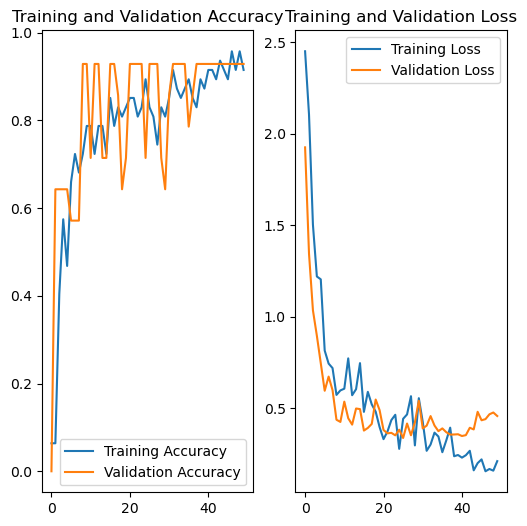

In [17]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


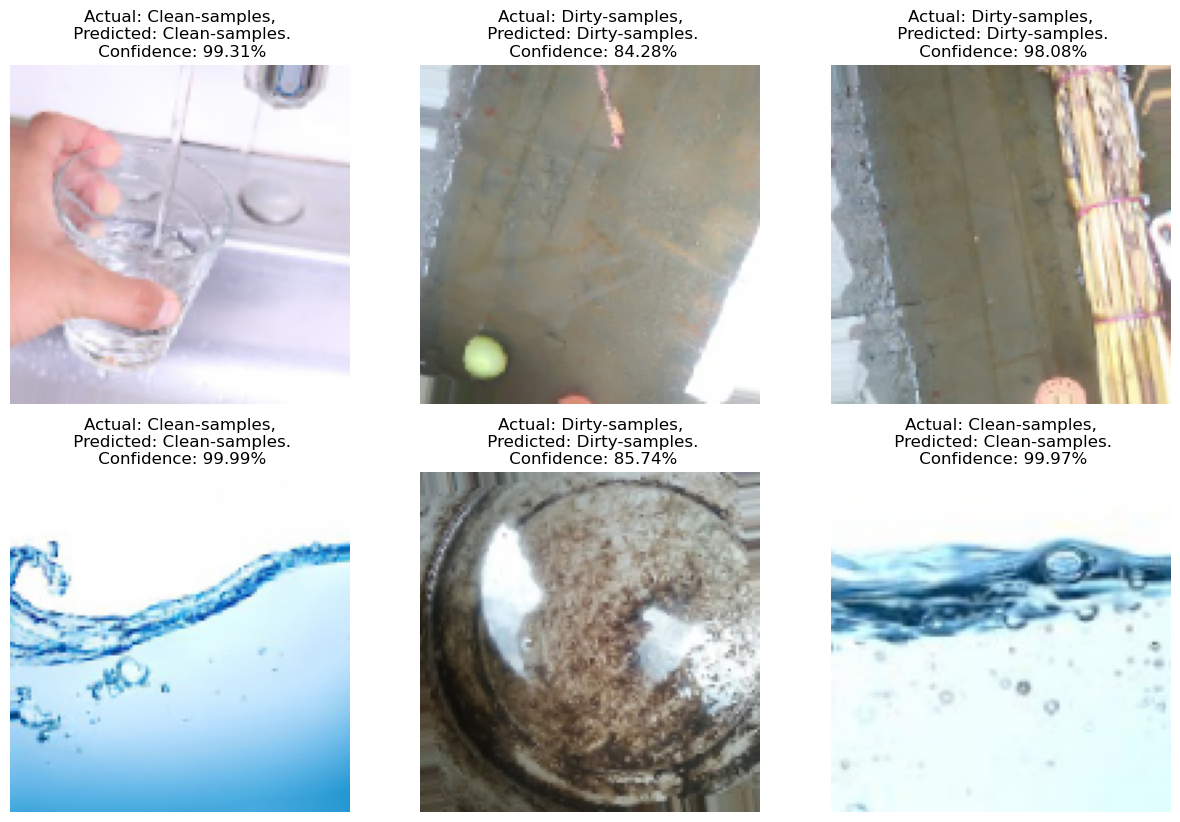

In [19]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break